In [192]:
# import pandas for data analysis
import pandas as pd 

# import seaborn for visualisations
import seaborn as sns


In [193]:
# import the csv file to a data set called weather_data
weather_data = pd.read_csv('./met-office-weather-month.csv')

# display the data to verify it has imported
weather_data = weather_data [weather_data['year'] >= 2000]

#Among the given options, 'Heathrow' is often considered more representative of the UK weather as a whole. 
#Heathrow is located near London, in the southeast of England, and it experiences a temperate maritime climate. 
#This location is relatively central and is not extreme in terms of climate conditions, 
#making it a reasonable choice for representing the overall weather patterns in the UK.
weather_data = weather_data[ weather_data['station'] == 'heathrow']
weather_data = weather_data.drop(columns = ['station', 'decade'])
weather_data

year  month  tmax  tmin   af  rain    sun
1126  2000      1   8.6   2.4  7.0  16.5   78.6
1127  2000      2  10.4   3.8  5.0  62.2  102.5
1128  2000      3  12.1   4.9  1.0  16.0  120.4
1129  2000      4  12.9   5.4  0.0  99.6  135.8
1130  2000      5  18.0   9.6  0.0  87.2  202.9
...    ...    ...   ...   ...  ...   ...    ...
1367  2020      2  11.1   4.3  1.0  99.8   62.0
1368  2020      3  12.0   3.9  1.0  42.8  148.0
1369  2020      4  18.2   6.5  1.0  38.2  235.4
1370  2020      5  21.1   9.1  0.0   2.0  308.6
1371  2020      6  22.5  12.6  0.0  54.0  174.9

[246 rows x 7 columns]

In [194]:
# display the data types of the features
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1126 to 1371
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    246 non-null    int64  
 1   month   246 non-null    int64  
 2   tmax    246 non-null    float64
 3   tmin    246 non-null    float64
 4   af      246 non-null    float64
 5   rain    246 non-null    float64
 6   sun     246 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 15.4 KB


In [195]:
# use describe to get the statistics for the feature
weather_data['tmax'].describe()

count    246.000000
mean      15.738211
std        5.747014
min        3.900000
25%       10.500000
50%       15.700000
75%       20.975000
max       28.300000
Name: tmax, dtype: float64

In [196]:
weather_data.columns

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun'], dtype='object')

In [197]:
song_data = pd.read_csv('./chart2000-songmonth-0-3-0070.csv')
song_data

month  position                         artist  \
0      Jan 2000         1           Rob Thomas & Santana   
1      Jan 2000         2             Christina Aguilera   
2      Jan 2000         3                  Savage Garden   
3      Jan 2000         4                    Celine Dion   
4      Jan 2000         5                      Eiffel 65   
...         ...       ...                            ...   
14295  Oct 2023        46                Chris Stapleton   
14296  Oct 2023        47                   Jason Aldean   
14297  Oct 2023        48                       Rod Wave   
14298  Oct 2023        49                          Drake   
14299  Oct 2023        50  Jelly Roll With Lainey Wilson   

                           song  indicativerevenue  us  uk  de  fr  ca  au  
0                        Smooth           3911.953   1   -  44   -   -   5  
1             What A Girl Wants           3787.015   1  81  18   -   1   9  
2            I Knew I Loved You           3693.844   1  56  68  43   1  21  
3          That's The Way It Is           3341.488   8  20   9  10   -  14  
4              Blue (Da Ba Dee)           3340.978   6  28  22  10   1   1  
...                         ...                ...  ..  ..  ..  ..  ..  ..  
14295               White Horse            724.267  38   -   -   -  33   -  
14296  Try That In A Small Town            722.445  36   -   -   -   -   -  
14297              Great Gatsby            721.896  30   -   -   -   -   -  
14298            Virginia Beach            719.335   3   6   -  36   3   9  
14299                   Save Me            707.076  37   -   -   -   -   -  

[14300 rows x 11 columns]

In [198]:
song_data.columns

song_data = song_data.drop(columns = ['indicativerevenue', 'us', 'uk','de', 'fr', 'ca', 'au'])


In [199]:
print("\nMissing values:")
print(song_data.isnull().sum())

# Drop any rows with missing values - is this the best way to do this?
song_data = song_data.dropna()


Missing values:
month       0
position    0
artist      0
song        0
dtype: int64


In [200]:

song_data[['Month', 'year']] = song_data.month.str.split(expand=True)
song_data = song_data.drop(columns = ['month'])
song_data.rename(columns={'Month': 'month'}, inplace=True)
song_data


position                         artist                      song  \
0             1           Rob Thomas & Santana                    Smooth   
1             2             Christina Aguilera         What A Girl Wants   
2             3                  Savage Garden        I Knew I Loved You   
3             4                    Celine Dion      That's The Way It Is   
4             5                      Eiffel 65          Blue (Da Ba Dee)   
...         ...                            ...                       ...   
14295        46                Chris Stapleton               White Horse   
14296        47                   Jason Aldean  Try That In A Small Town   
14297        48                       Rod Wave              Great Gatsby   
14298        49                          Drake            Virginia Beach   
14299        50  Jelly Roll With Lainey Wilson                   Save Me   

      month  year  
0       Jan  2000  
1       Jan  2000  
2       Jan  2000  
3       Jan  2000  
4       Jan  2000  
...     ...   ...  
14295   Oct  2023  
14296   Oct  2023  
14297   Oct  2023  
14298   Oct  2023  
14299   Oct  2023  

[14300 rows x 5 columns]

In [201]:
song_data["month"].unique()

# Define a dictionary to map month names to numbers
month_to_number = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun' : 6, 'Jul' : 7, 'Aug': 8, 
                   'Sep': 9,'Oct': 10, 'Nov': 11, 'Dec': 12}

# Use the map function to convert month names to numbers
song_data['month'] = song_data['month'].map(month_to_number)

# Display the result
song_data

position                         artist                      song  \
0             1           Rob Thomas & Santana                    Smooth   
1             2             Christina Aguilera         What A Girl Wants   
2             3                  Savage Garden        I Knew I Loved You   
3             4                    Celine Dion      That's The Way It Is   
4             5                      Eiffel 65          Blue (Da Ba Dee)   
...         ...                            ...                       ...   
14295        46                Chris Stapleton               White Horse   
14296        47                   Jason Aldean  Try That In A Small Town   
14297        48                       Rod Wave              Great Gatsby   
14298        49                          Drake            Virginia Beach   
14299        50  Jelly Roll With Lainey Wilson                   Save Me   

       month  year  
0          1  2000  
1          1  2000  
2          1  2000  
3          1  2000  
4          1  2000  
...      ...   ...  
14295     10  2023  
14296     10  2023  
14297     10  2023  
14298     10  2023  
14299     10  2023  

[14300 rows x 5 columns]

In [202]:
#matching the end dates of the two dataframes to June 2020

song_data['year'] = song_data['year'].astype(int)
song_data = song_data[ song_data["year"] <= 2020 ]
# Get the number of rows in the DataFrame
num_rows = song_data.shape[0]

# Specify the number of rows to delete (e.g., 50)
rows_to_delete = 150

# Calculate the starting index for rows to be deleted
start_index = num_rows - rows_to_delete

# Delete the last 50 rows
song_data = song_data.drop(index=range(start_index, num_rows))
song_data

position                    artist                   song  month  year
0             1      Rob Thomas & Santana                 Smooth      1  2000
1             2        Christina Aguilera      What A Girl Wants      1  2000
2             3             Savage Garden     I Knew I Loved You      1  2000
3             4               Celine Dion   That's The Way It Is      1  2000
4             5                 Eiffel 65       Blue (Da Ba Dee)      1  2000
...         ...                       ...                    ...    ...   ...
12445        46        Surf Mesa & Emilee  ILY (I Love You Baby)      9  2020
12446        47                 Lil Mosey        Blueberry Faygo      9  2020
12447        48                Kane Brown             Cool Again      9  2020
12448        49  BLACKPINK & Selena Gomez              Ice Cream      9  2020
12449        50            Future & Drake           Life Is Good      9  2020

[12450 rows x 5 columns]

In [203]:

# Convert 'year' and 'month' columns in df_songs to integers
song_data['year'] = song_data['year'].astype(int)
#song_data['month'] = pd.to_datetime(song_data['month'], format='%b').dt.month  # Convert month abbreviations to integers

# Merge DataFrames based on 'year' and 'month'
merged_df = pd.merge(weather_data, song_data, on=['year', 'month'])

# Display the result
print(merged_df)

       year  month  tmax  tmin   af  rain    sun  position  \
0      2000      1   8.6   2.4  7.0  16.5   78.6         1   
1      2000      1   8.6   2.4  7.0  16.5   78.6         2   
2      2000      1   8.6   2.4  7.0  16.5   78.6         3   
3      2000      1   8.6   2.4  7.0  16.5   78.6         4   
4      2000      1   8.6   2.4  7.0  16.5   78.6         5   
...     ...    ...   ...   ...  ...   ...    ...       ...   
12295  2020      6  22.5  12.6  0.0  54.0  174.9        46   
12296  2020      6  22.5  12.6  0.0  54.0  174.9        47   
12297  2020      6  22.5  12.6  0.0  54.0  174.9        48   
12298  2020      6  22.5  12.6  0.0  54.0  174.9        49   
12299  2020      6  22.5  12.6  0.0  54.0  174.9        50   

                                     artist                   song  
0                      Rob Thomas & Santana                 Smooth  
1                        Christina Aguilera      What A Girl Wants  
2                             Savage Garden     

In [204]:
# Save the DataFrame to a CSV file
merged_df.to_csv('mergedWeatherSongData.csv', index=False)
merged_df.columns

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'position',
       'artist', 'song'],
      dtype='object')

In [205]:
myplaylist = pd.read_csv('./my_playlist.csv')
myplaylist = myplaylist.drop(columns = ['Album Name', 'Release Date','Popularity','Added By', 'Added At', 'Mode', 'Time Signature', 'Unnamed: 23' ])

myplaylist.rename(columns={'Track Name': 'song'}, inplace=True)

myplaylist.to_csv('playlistedited.csv', index=False)
myplaylist.columns

Index(['Spotify ID', 'Artist IDs', 'song', 'Artist Name(s)', 'Duration (ms)',
       'Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [206]:

# Merge the dataframes based on the lowercase "song" column
merged1 = pd.merge(merged_df, myplaylist, how='inner', left_on='song', right_on='song')


In [207]:
merged1.shape
columns_to_consider = ['song', 'year', 'month']
merged1 =merged1.drop_duplicates(subset=columns_to_consider)

In [208]:
merged1.shape

(7622, 25)

In [209]:


merged_copy = merged_df.copy()
myplaylist_copy = myplaylist.copy()
merged_copy['song'] = merged_copy['song'].str.lower()
myplaylist_copy['song'] = myplaylist_copy['song'].str.lower()

merged2 = pd.merge(merged_copy, myplaylist_copy, right_on='song', left_on = 'song', how='inner')

columns_to_consider = ['song', 'year', 'month']
merged2 =merged2.drop_duplicates(subset=columns_to_consider)
# Display the merged dataframe
merged2.head()


year  month  tmax  tmin   af  rain    sun  position              artist  \
0   2000      1   8.6   2.4  7.0  16.5   78.6         2  Christina Aguilera   
4   2000      2  10.4   3.8  5.0  62.2  102.5         1  Christina Aguilera   
8   2000      3  12.1   4.9  1.0  16.0  120.4         5  Christina Aguilera   
12  2000      4  12.9   5.4  0.0  99.6  135.8        15  Christina Aguilera   
16  2000      1   8.6   2.4  7.0  16.5   78.6         3       Savage Garden   

                  song  ... Danceability Energy  Key Loudness Speechiness  \
0    what a girl wants  ...        0.754  0.819  0.0   -6.833      0.1120   
4    what a girl wants  ...        0.754  0.819  0.0   -6.833      0.1120   
8    what a girl wants  ...        0.754  0.819  0.0   -6.833      0.1120   
12   what a girl wants  ...        0.754  0.819  0.0   -6.833      0.1120   
16  i knew i loved you  ...         0.61  0.497  9.0   -9.880      0.0279   

   Acousticness  Instrumentalness  Liveness  Valence    Tempo  
0        0.0684          0.000000    0.3450    0.818  142.137  
4        0.0684          0.000000    0.3450    0.818  142.137  
8        0.0684          0.000000    0.3450    0.818  142.137  
12       0.0684          0.000000    0.3450    0.818  142.137  
16       0.3200          0.000061    0.0884    0.739   85.031  

[5 rows x 25 columns]

In [210]:
import pandas as pd

merged3 = pd.concat([merged1, merged2], ignore_index=False)

# Sort the merged DataFrame by "year" and "position"
merged3 = merged3.sort_values(by=['year', 'month'])

# Now, merged_df contains the me
merged3.head()
merged3.to_csv('merged3.csv', index=False)

In [241]:
merged3.head

<bound method NDFrame.head of        year  month  tmax  tmin   af  rain    sun  position  \
0      2000      1   8.6   2.4  7.0  16.5   78.6         3   
25     2000      1   8.6   2.4  7.0  16.5   78.6         6   
61     2000      1   8.6   2.4  7.0  16.5   78.6         8   
65     2000      1   8.6   2.4  7.0  16.5   78.6         9   
74     2000      1   8.6   2.4  7.0  16.5   78.6        11   
...     ...    ...   ...   ...  ...   ...    ...       ...   
37192  2020      6  22.5  12.6  0.0  54.0  174.9        15   
11063  2020      6  22.5  12.6  0.0  54.0  174.9         3   
13259  2020      6  22.5  12.6  0.0  54.0  174.9        13   
21410  2020      6  22.5  12.6  0.0  54.0  174.9         1   
40620  2020      6  22.5  12.6  0.0  54.0  174.9        15   

                                       artist                      song  ...  \
0                               Savage Garden        I Knew I Loved You  ...   
25                             Brian McKnight               Back 

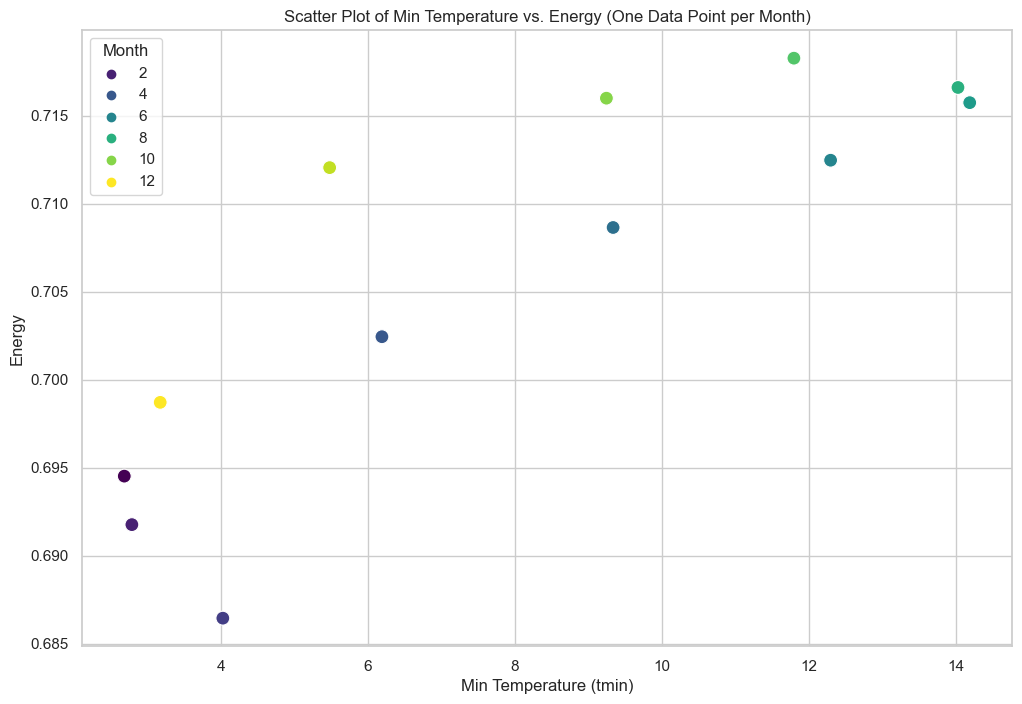

In [212]:
import matplotlib.pyplot as plt

# Group by month and calculate the mean for each group
monthly_means = merged3.groupby('month').mean()

# Select one data point for each month
selected_data_points = monthly_means[['tmin', 'Energy']]

# Reset index to make 'month' a column
selected_data_points.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='tmin', y='Energy', data=selected_data_points, hue='month', palette='viridis', s=100)
plt.title('Scatter Plot of Min Temperature vs. Energy (One Data Point per Month)')
plt.xlabel('Min Temperature (tmin)')
plt.ylabel('Energy')
plt.legend(title='Month')
plt.show()

In [213]:

# Drop rows with NaN values
merged3 = merged3.dropna()

print(merged3.shape)

merged3.to_csv('merged3.csv', index=False)

#shape:(16024, 25)
#shape after dropping na (15800, 25)

(15800, 25)


In [214]:

df = merged3.copy()
# Group by 'year' and 'month'
grouped = df.groupby(['year', 'month'])

# Function to re-rank the 'position' column within each group
def rerank_positions(group):
    group['position'] = range(1, len(group) + 1)
    return group

# Apply the rerank_positions function to each group
df_reranked = grouped.apply(rerank_positions)

# Reset index after applying the function
df_reranked.reset_index(drop=True, inplace=True)



In [215]:
# Now df_reranked has the 'position' column re-ranked within each 'year' and 'month' group
df_reranked.shape
df_reranked.to_csv('rankedsongsXweather.csv', index=False)

In [216]:
import numpy as np

# Group by 'year' and 'month'
grouped = df_reranked.groupby(['year', 'month'])

# Function to create a binary 'popularity' column based on the 'position' within each group
def determine_popularity(group):
    group['popularity'] = np.where(group['position'] <= 20, 1, 0)
    return group

# Apply the determine_popularity function to each group
df_with_popularity = grouped.apply(determine_popularity)

# Reset index after applying the function
df_with_popularity.reset_index(drop=True, inplace=True)

#considering the top ten songs as popular and the others as not popular 

#dropping the position column as it is no longer needed and we'll be using the populariy column instead
#to train our model
column_to_drop = 'position'  # Replace this with the actual column name you want to drop

df_with_popularity = df_with_popularity.drop(column_to_drop, axis=1)

df_with_popularity.head()

df_with_popularity.to_csv('rankedsongsXweathertop20.csv', index=False)

In [217]:
df_with_popularity.head

<bound method NDFrame.head of        year  month  tmax  tmin   af  rain    sun  \
0      2000      1   8.6   2.4  7.0  16.5   78.6   
1      2000      1   8.6   2.4  7.0  16.5   78.6   
2      2000      1   8.6   2.4  7.0  16.5   78.6   
3      2000      1   8.6   2.4  7.0  16.5   78.6   
4      2000      1   8.6   2.4  7.0  16.5   78.6   
...     ...    ...   ...   ...  ...   ...    ...   
15795  2020      6  22.5  12.6  0.0  54.0  174.9   
15796  2020      6  22.5  12.6  0.0  54.0  174.9   
15797  2020      6  22.5  12.6  0.0  54.0  174.9   
15798  2020      6  22.5  12.6  0.0  54.0  174.9   
15799  2020      6  22.5  12.6  0.0  54.0  174.9   

                                       artist                      song  \
0                               Savage Garden        I Knew I Loved You   
1                              Brian McKnight               Back At One   
2                             Jessica Simpson  I Wanna Love You Forever   
3      Missy 'Misdemeanor' Elliott, NAS & Eve

In [218]:
import pandas as pd
data = df_with_popularity.copy()

# Step 0: Reset 'popularity' column to -1
data['popularity'] = -1

# Step 1: Rank the songs within each month based on popularity
data['rank'] = data.groupby(['year', 'month'])['popularity'].rank(ascending=False, method='first')

# Step 2: Set the top 10 songs in each month to have a popularity value of 1
data.loc[data['rank'] <= 10, 'popularity'] = 1

# Step 3: Set the last 10 songs in each month to have a popularity value of 0
# Assuming the ranking starts from 1 for each month
data.loc[data['rank'] > (data.groupby(['year', 'month'])['rank'].transform('max') - 10), 'popularity'] = 0

# Step 4: Drop the songs in between the top 10 and last 10
data = data[data['popularity'].isin([0, 1])]

# Drop the temporary 'rank' column
data = data.drop(columns=['rank'])
data.head()
data.to_csv('top10bestandworst.csv', index=False)

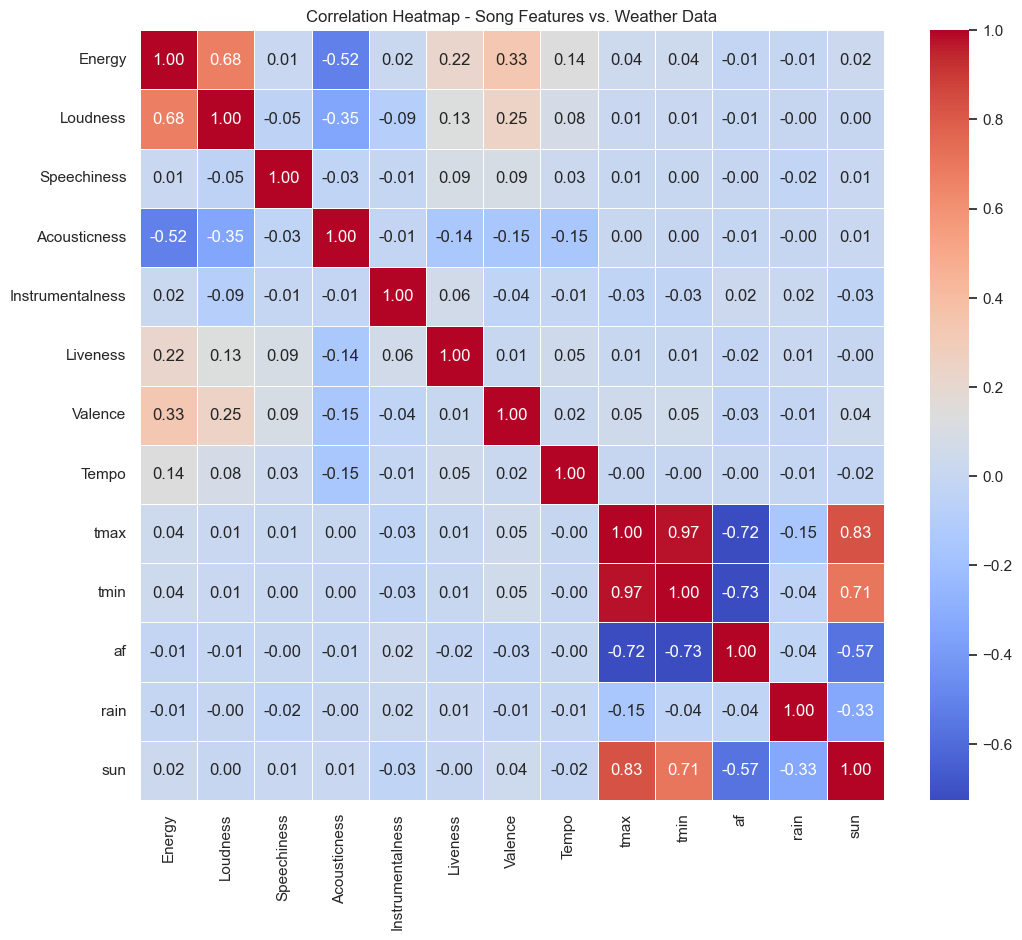

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select relevant features for correlation analysis
selected_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'tmax', 'tmin', 'af', 'rain', 'sun']

# Create a correlation matrix
correlation_matrix = data[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Heatmap - Song Features vs. Weather Data")
plt.show()


In [220]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Assuming your DataFrame is named 'data' and has a 'month' column
data2 = data.copy()
data2['season'] = data2['month'].apply(get_season)
print(data2.columns)


Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'artist', 'song',
       'Spotify ID', 'Artist IDs', 'Artist Name(s)', 'Duration (ms)', 'Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'popularity', 'season'],
      dtype='object')


In [221]:
data2 = pd.get_dummies(data2, columns=['season'], drop_first=False)
print(data2.columns)

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'artist', 'song',
       'Spotify ID', 'Artist IDs', 'Artist Name(s)', 'Duration (ms)', 'Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'popularity', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')


In [222]:
data2.to_csv('top10bestandworst2.csv', index=False)

In [223]:
data2.columns

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'artist', 'song',
       'Spotify ID', 'Artist IDs', 'Artist Name(s)', 'Duration (ms)', 'Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'popularity', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

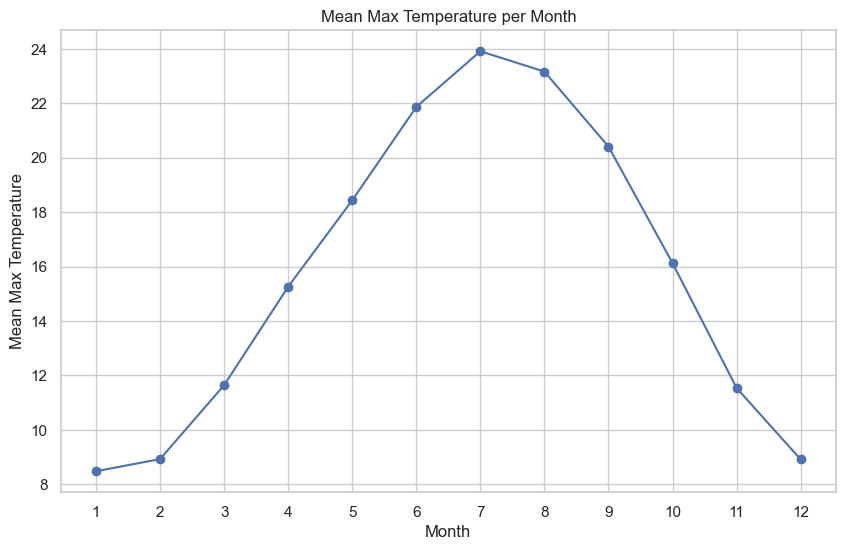

In [275]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has 'month' and 'tmax' columns
# You might need to adjust column names based on your actual DataFrame
mean_temp_per_month = data2.groupby('month')['tmax'].mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(mean_temp_per_month, marker='o', linestyle='-')
plt.title('Mean Max Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Mean Max Temperature')
plt.xticks(range(1, 13))  # Assuming months are represented as 1 to 12
plt.grid(True)
plt.show()

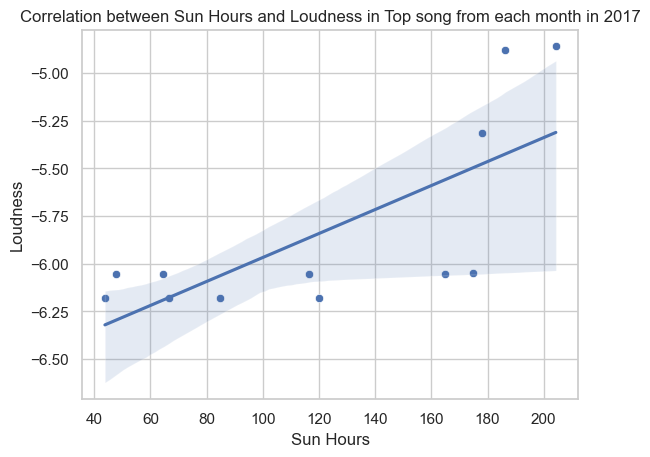

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called top_songs_per_month with columns 'sun_hours' and 'danceability'
# Plot a scatter plot

top_songs_per_month = data2[data2['popularity'] == 1].groupby(['year', 'month']).head(10)
top_songs_per_month = data2[data2['year'] == 2017]
top_songs_per_month = top_songs_per_month.sort_values(by=['year', 'month', 'popularity'], ascending=[True, True, False])

# Keep only the top song from each month
top_songs_per_month = top_songs_per_month.groupby(['year', 'month']).first().reset_index()

# Plot a scatter plot
sns.scatterplot(x='sun', y='Loudness', data=top_songs_per_month)

# Add a regression line (linear fit)
sns.regplot(x='sun', y='Loudness', data=top_songs_per_month, scatter=False)

# Customize the plot
plt.title('Correlation between Sun Hours and Loudness in Top song from each month in 2017')
plt.xlabel('Sun Hours')
plt.ylabel('Loudness')

# Show the plot
plt.show()



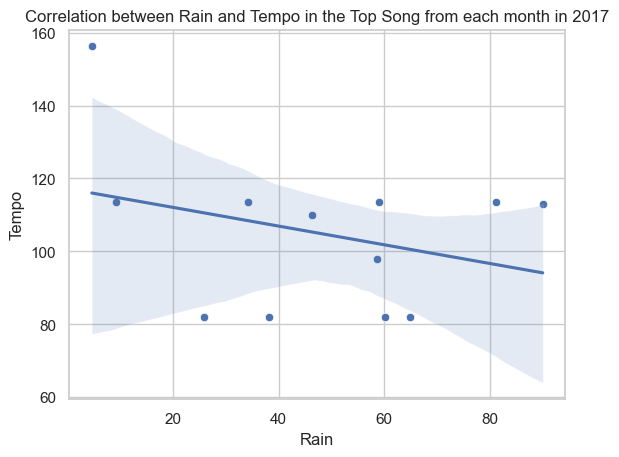

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called top_songs_per_month with columns 'sun_hours' and 'danceability'
# Plot a scatter plot

top_songs_per_month = data2[data2['popularity'] == 1].groupby(['year', 'month']).head(10)
top_songs_per_month = data2[data2['year'] == 2017]
top_songs_per_month = top_songs_per_month.sort_values(by=['year', 'month', 'popularity'], ascending=[True, True, False])

# Keep only the top song from each month
top_songs_per_month = top_songs_per_month.groupby(['year', 'month']).first().reset_index()

# Plot a scatter plot
sns.scatterplot(x='rain', y='Tempo', data=top_songs_per_month)

# Add a regression line (linear fit)
sns.regplot(x='rain', y='Tempo', data=top_songs_per_month, scatter=False)

# Customize the plot
plt.title('Correlation between Rain and Tempo in the Top Song from each month in 2017')
plt.xlabel('Rain')
plt.ylabel('Tempo')

# Show the plot
plt.show()

/var/folders/k9/1crby1g57j94607lxk6x_dgh0000gn/T/ipykernel_12004/157570095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_songs['season'] = popular_songs['month'].apply(get_season)
/var/folders/k9/1crby1g57j94607lxk6x_dgh0000gn/T/ipykernel_12004/157570095.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='season', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="viridis")
/var/folders/k9/1crby1g57j94607lxk6x_dgh0000gn/T/ipykernel_12004/157570095.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='season', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="vir

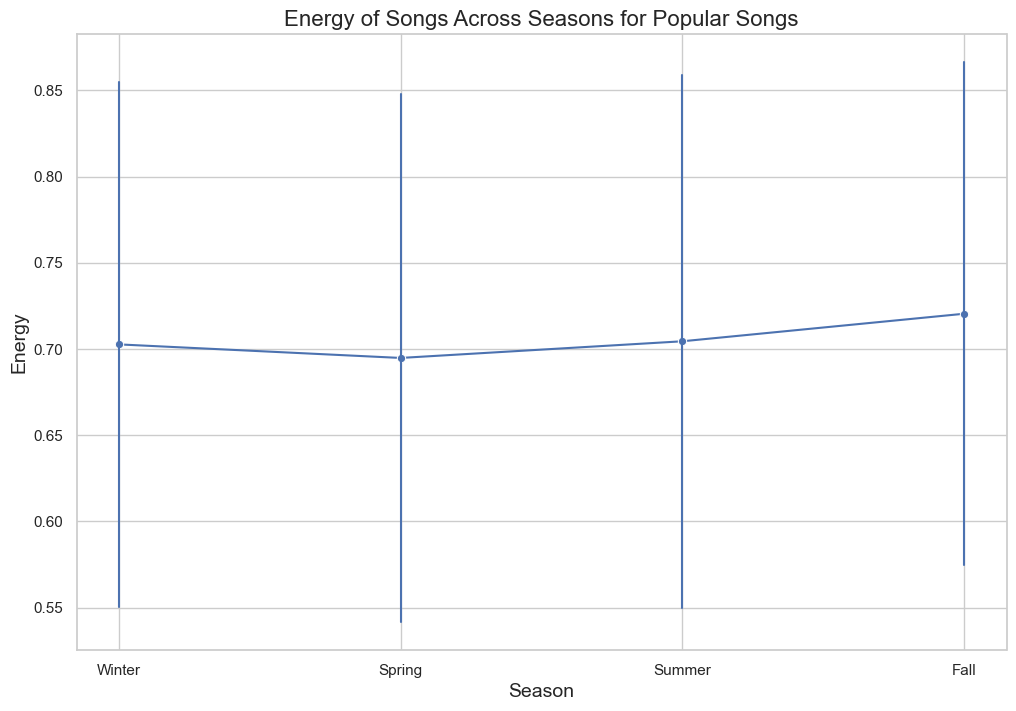

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a 'popularity' column
# Filter the DataFrame to include only popular songs (popularity equal to 1)
popular_songs = data2[data2['popularity'] == 1]

# Add a 'season' column to your DataFrame (assuming it's not there already)
popular_songs['season'] = popular_songs['month'].apply(get_season)


plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="viridis")
plt.title('Energy of Songs Across Seasons for Popular Songs', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.show()



/var/folders/k9/1crby1g57j94607lxk6x_dgh0000gn/T/ipykernel_12004/4274047043.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='month', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="viridis")
/var/folders/k9/1crby1g57j94607lxk6x_dgh0000gn/T/ipykernel_12004/4274047043.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="viridis")


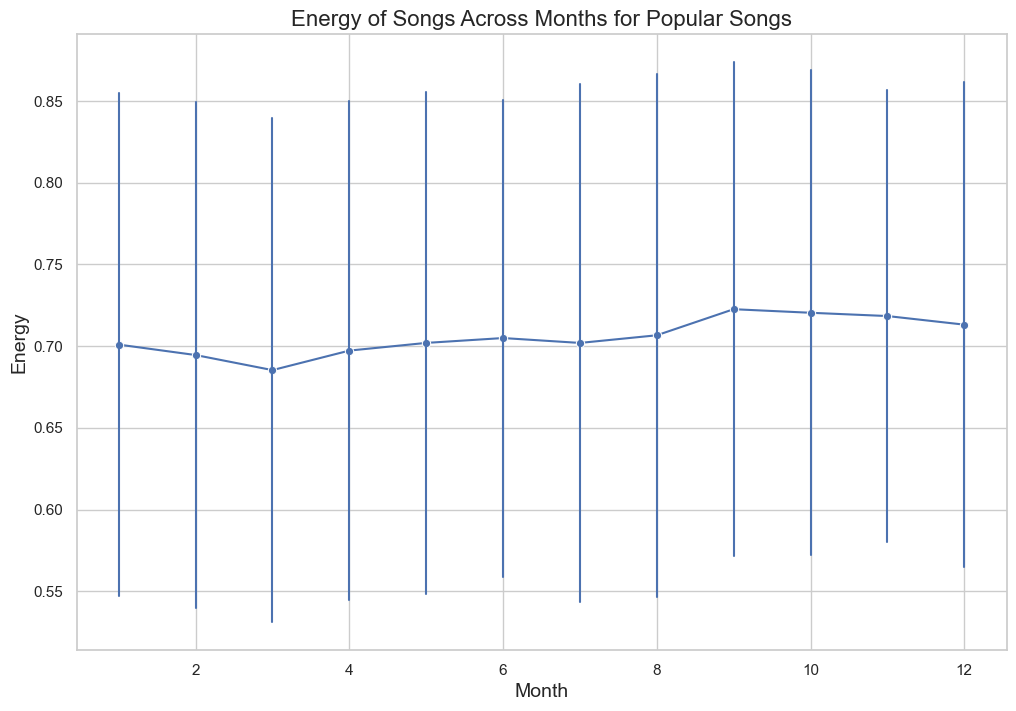

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a 'popularity' column
# Filter the DataFrame to include only popular songs (popularity equal to 1)
popular_songs = data2[data2['popularity'] == 1]

# Add a 'season' column to your DataFrame (assuming it's not there already)

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Energy', data=popular_songs, ci='sd', marker='o', err_style="bars", palette="viridis")
plt.title('Energy of Songs Across Months for Popular Songs', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.show()



In [159]:
class_counts = data2['popularity'].value_counts()
print(class_counts)


0    2427
1    2288
Name: popularity, dtype: int64


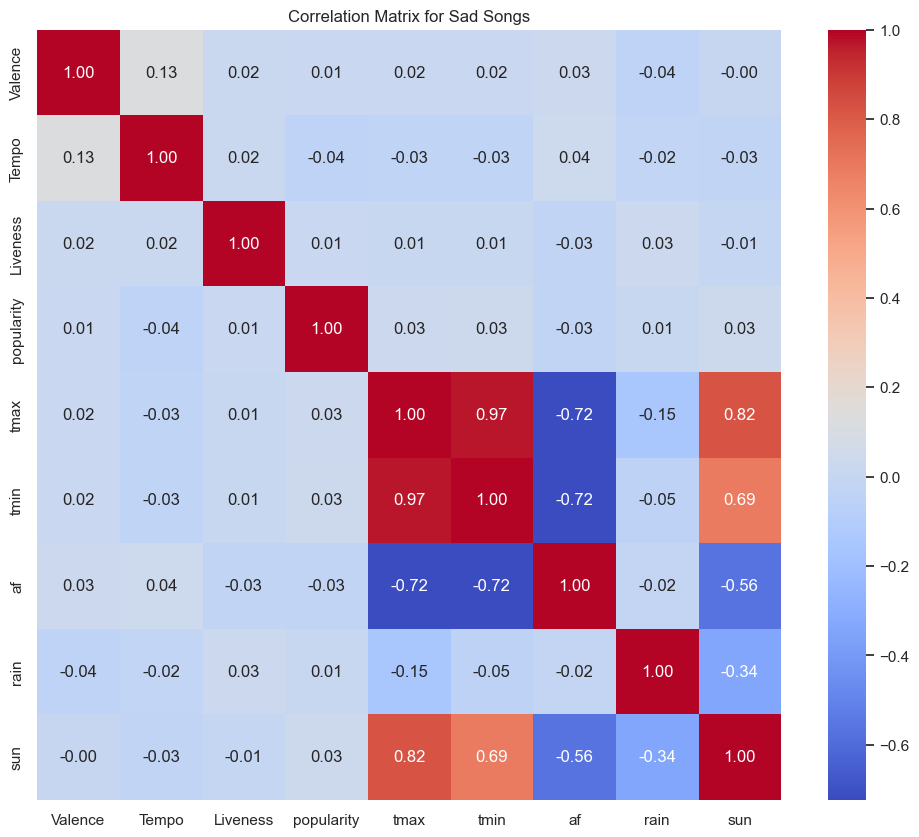

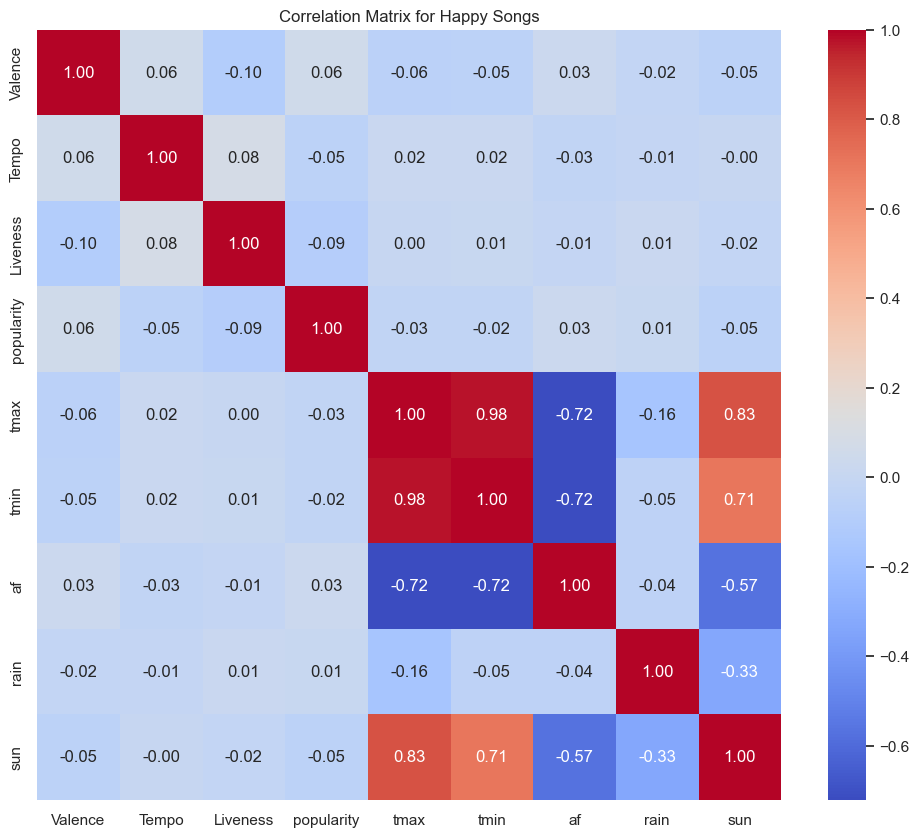

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'positive_songs' with relevant columns
# and 'weather_features' contains the weather-related columns

# Define the threshold for sad songs
threshold_valence_sad = 0.4  # Adjust this threshold as needed
positive_songs = data2.copy()
sad_songs = positive_songs[positive_songs['Valence'] < threshold_valence_sad]

# Drop columns and rows with all NaN values
sad_songs = sad_songs.dropna(axis=1, how='all')
sad_songs = sad_songs.dropna(axis=0, how='all')

# Calculate correlation matrix for sad songs
correlation_matrix_sad = sad_songs[['Valence', 'Tempo', 'Liveness', 'popularity'] + weather_features].corr()

# Plot heatmap for sad songs
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_sad, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sad Songs')
plt.show()

# Define the threshold for happy songs
threshold_valence_happy = 0.7  # Adjust this threshold as needed
happy_songs = positive_songs[positive_songs['Valence'] > threshold_valence_happy]

# Drop columns and rows with all NaN values
happy_songs = happy_songs.dropna(axis=1, how='all')
happy_songs = happy_songs.dropna(axis=0, how='all')

# Calculate correlation matrix for happy songs
correlation_matrix_happy = happy_songs[['Valence', 'Tempo', 'Liveness', 'popularity'] + weather_features].corr()

# Plot heatmap for happy songs
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_happy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Happy Songs')
plt.show()


In [270]:
import pandas as pd


# Define the threshold for sad and happy songs
threshold_valence_sad = 0.4
threshold_valence_happy = 0.7
positive_songs = data2.copy()
# Create subsets for sad and happy songs
sad_songs = positive_songs[positive_songs['Valence'] < threshold_valence_sad]
happy_songs = positive_songs[positive_songs['Valence'] > threshold_valence_happy]
# Replace 'Energy', 'Tempo', 'Liveness', ... with your actual feature names
weather_features = ['tmax', 'tmin', 'af', 'rain', 'sun']


# Calculate means for each feature
mean_sad = sad_songs[['Energy', 'Tempo', 'Liveness'] + weather_features].mean()
mean_happy = happy_songs[['Energy', 'Tempo', 'Liveness'] + weather_features].mean()

# Calculate medians for each feature
median_sad = sad_songs[['Energy', 'Tempo', 'Liveness'] + weather_features].median()
median_happy = happy_songs[['Energy', 'Tempo', 'Liveness'] + weather_features].median()

# Combine means and medians into a summary DataFrame
summary_df = pd.DataFrame({
    'Mean_Sad': mean_sad,
    'Mean_Happy': mean_happy,
    'Median_Sad': median_sad,
    'Median_Happy': median_happy
})

# Display the summary DataFrame
print(summary_df)


            Mean_Sad  Mean_Happy  Median_Sad  Median_Happy
Energy      0.633187    0.758975       0.652         0.781
Tempo     120.347471  120.687704     120.318       119.977
Liveness    0.162147    0.166998       0.121         0.112
tmax       15.309959   16.105329      15.100        16.300
tmin        7.600412    8.271058       7.000         8.500
af          2.258242    1.948187       0.000         0.000
rain       53.256456   52.752850      47.600        45.000
sun       127.697459  134.607106     120.400       137.000
